#Сбор данных

Импортируем основные библиотеки.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Скачиваем датасет.

In [5]:
!pip install -q opendatasets

In [6]:
import opendatasets as od

ds_url = 'https://www.kaggle.com/competitions/tutors-lessons-prices-prediction'
od.download(ds_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alexzyukov
Your Kaggle Key: ··········


100%|██████████| 2.56M/2.56M [00:00<00:00, 271MB/s]


Extracting archive ./tutors-lessons-prices-prediction/tutors-lessons-prices-prediction.zip to ./tutors-lessons-prices-prediction


In [7]:
import os

os.listdir('./tutors-lessons-prices-prediction')

['train.xlsx', 'sample_submit.csv', 'test.xlsx']

In [8]:
train = pd.read_excel('/content/tutors-lessons-prices-prediction/train.xlsx')
test = pd.read_excel('/content/tutors-lessons-prices-prediction/test.xlsx')
sample_submit = pd.read_csv('/content/tutors-lessons-prices-prediction/sample_submit.csv')

#Исследование данных

Исследуем `train`.

In [9]:
train.head(2)

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667


In [10]:
test.head(2)

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
0,0,matematika,Репетитор по математике Тихонова Наталья Бори...,"['Школьная программа', 'Подготовка к ЕГЭ', 'Ан...",4,13,Дистанционное убучение по Skype с прим...,NaN,Петрозаводский государственный университет,"Год окончания: 1981, Факультет: физико-матема...",...,NaN,Частный преподаватель,26 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,1,matematika,Репетитор по математике Худайбердина Милана Р...,"['Школьная программа', 'Математический анализ'...",0,0,Буду рада помочь в освоении дисциплин ...,NaN,"Национальный исследовательский университет ""В...","Год окончания: 2022, Факультет: Московский ин...",...,NaN,Студент,4 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."


In [11]:
sample_submit.head()

,index,mean_price
0,0,19.878115
1,1,0.903784
2,2,19.925667
3,3,22.705076
4,4,33.187842


In [12]:
train.isna().sum()

,0
Unnamed: 0,0
предмет,0
ФИО,0
tutor_head_tags,0
tutor_rating,589
tutor_reviews,0
description,1
experience_desc,2377
Education_1,0
Desc_Education_1,76


В данных много пропусков.

In [13]:
train.describe()

,Unnamed: 0,tutor_rating,tutor_reviews,mean_price
count,4548.000000,3959.000000,4548.000000,4548.000000
mean,2273.500000,1.895933,2.989006,16.197949
std,1313.038842,2.280103,8.516939,10.485108
min,0.000000,0.000000,0.000000,0.041667
25%,1136.750000,0.000000,0.000000,10.000000
50%,2273.500000,0.000000,0.000000,15.000000
75%,3410.250000,4.000000,2.000000,20.888889
max,4547.000000,5.000000,152.000000,100.000000


У целевой переменной много выбросов, стандартное отклонение порядка величины среднего значения. Построим гистограмму и boxplot.

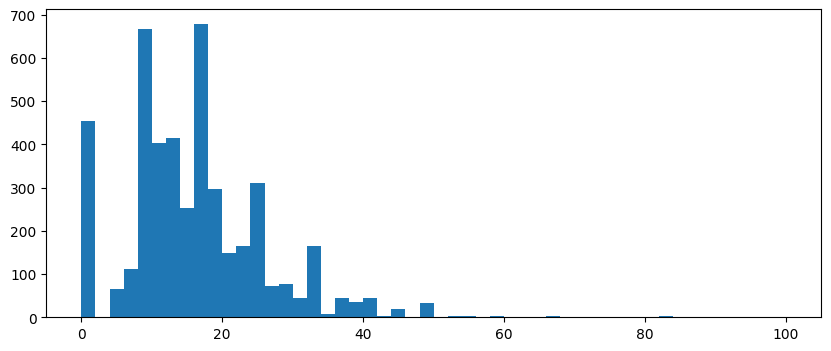

In [14]:
plt.figure(figsize=(10, 4))
plt.hist(train['mean_price'], bins=50)
plt.show()

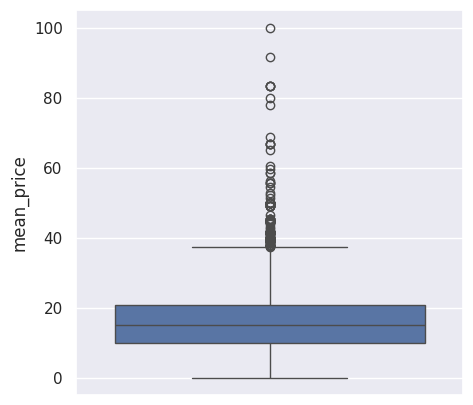

In [15]:
import seaborn as sns

sns.set(rc={'figure.figsize':(5, 5)})
sns.boxplot(train['mean_price'])
plt.show()

Исследуем категориальные признаки.

In [16]:
train['предмет'].value_counts()

,count
предмет,
matematika,3685
informatika,863


In [17]:
train = pd.get_dummies(train, columns=['предмет'])
train.head(2)

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price,предмет_informatika,предмет_matematika
0,0,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,False,True
1,1,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667,False,True


In [18]:
train['status'] = train['status'].apply(
    lambda x: x.split(',') if isinstance(x, str) else np.nan
)

In [19]:
train['status']

,status
0,[ Университетский преподаватель]
1,[ Школьный преподаватель]
2,[ Школьный преподаватель]
3,[ Частный преподаватель]
4,[ Частный преподаватель]
...,...
4543,[ Частный преподаватель]
4544,[ Школьный преподаватель]
4545,[ Студент]
4546,[ Студент]


In [20]:
train['categories'].head()

,categories
0,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
2,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
3,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."


Реализуем функцию, которая кодирует списки строк в столбцы со значениями multihotbinary-векторов.

In [21]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

def expand_multilabel_column(df, column_name):
    df[column_name] = df[column_name].apply(
        lambda x: ast.literal_eval(x) if isinstance(x, str) else x if isinstance(x, list) else np.nan)

    binarizer = MultiLabelBinarizer()
    categories_enc = binarizer.fit_transform(df[column_name])
    categories = pd.DataFrame(categories_enc, columns=binarizer.classes_)

    df = pd.concat([df, categories], axis=1)
    return df, binarizer

Применим к `categories`.

In [22]:
train, cat_binarizer = expand_multilabel_column(train, 'categories')
train['categories'][0]

['Школьники с 5 по 9 класс',
 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты']

Преобразуем `tutor_head_tags`, `status`.

In [23]:
train, tags_binarizer = expand_multilabel_column(train, 'tutor_head_tags')
train['tutor_head_tags'][0]

['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ']

In [24]:
status_mode = str(train['status'].mode()[0])
train['status'] = train['status'].fillna(status_mode)
train, stat_binarizer = expand_multilabel_column(train, 'status')
train['status'][0]

[' Университетский преподаватель']

In [25]:
train.head(1)

,Unnamed: 0,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,...,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа,Аспирант или ординатор очной формы обучения,Студент,Университетский преподаватель,Частный преподаватель,Школьный преподаватель
0,0,Репетитор по математике Емельянова Марина Вла...,"[Школьная программа, Подготовка к ЕГЭ, Подгото...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,...,0,0,0,0,1,0,0,1,0,0


In [26]:
train['Desc_Education_1'].head()

,Desc_Education_1
0,"Год окончания: 1990, Факультет: механико-мате..."
1,"Год окончания: 2017, Факультет: факультет при..."
2,"Год окончания: 2008, Факультет: Математически..."
3,"Год окончания: 2021, Факультет: физический фа..."
4,"Год окончания: 2005, Факультет: Энергетически..."


Не учитываем данные об образовании, предполагая, что они коррелируют со стажем работы.

In [27]:
train['experience'].unique()

array([' 31 год ', ' 8 лет ', ' 11 лет ', ' 5 лет ', ' 19 лет ',
       ' 7 лет ', ' 27 лет ', ' 9 лет ', ' 38 лет ', ' 28 лет ',
       ' 17 лет ', ' 6 лет ', ' 13 лет ', ' 45 лет ', ' 4 года ',
       ' 3 года ', ' 10 лет ', ' 2 года ', ' 14 лет ', ' 20 лет ',
       ' 18 лет ', ' 32 года ', ' 16 лет ', ' 21 год ', ' 15 лет ',
       ' 12 лет ', ' 1 год ', ' 24 года ', ' 29 лет ', ' 22 года ',
       ' 39 лет ', ' 23 года ', ' 25 лет ', ' 34 года ', nan, ' 33 года ',
       ' 43 года ', ' 36 лет ', ' 40 лет ', ' 26 лет ', ' 41 год ',
       ' 30 лет ', ' 42 года ', ' 37 лет ', ' 35 лет ', ' 47 лет ',
       ' 44 года ', ' 53 года ', ' 55 лет ', ' 68 лет ', ' 48 лет ',
       ' 52 года ', ' 50 лет ', ' 46 лет ', ' 51 год ', ' 54 года '],
      dtype=object)

В колонке `experience` имеется 25 значений NaN, остальные закодируем как числа.

In [28]:
train['experience'] = train['experience'].apply(
    lambda x: float(x.split()[0]) if isinstance(x, str) else np.nan
)
train['experience'] = train['experience'].astype('float32')

In [29]:
train['experience'].describe()

,experience
count,4523.000000
mean,10.446385
std,9.551787
min,1.000000
25%,4.000000
50%,7.000000
75%,13.000000
max,68.000000


#Подготовка данных

Оставим только числовые принаки.

In [30]:
numeric_columns = train.select_dtypes(include='number').columns
train = train[numeric_columns]

In [31]:
train.drop(columns=['Unnamed: 0'], inplace=True)

In [32]:
train.head()

,tutor_rating,tutor_reviews,experience,mean_price,Взрослые кроме абитуриентов и студентов,Взрослые кроме абитуриентов и студентов в паре,Взрослые кроме абитуриентов и студентов группа,Дошкольники,Дошкольники в паре,Дошкольники группа,...,Подготовка к олимпиадам,ТФКП,Теория вероятности и мат. статистика,Уравнения мат физики,Школьная программа,Аспирант или ординатор очной формы обучения,Студент,Университетский преподаватель,Частный преподаватель,Школьный преподаватель
0,5.0,2,31.0,16.666667,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,4.0,7,8.0,11.666667,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.0,0,11.0,23.333333,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,4.0,19,5.0,0.116667,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,0.0,0,19.0,16.666667,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Обработаем пропуски.

In [33]:
train.isna().sum()

,0
tutor_rating,589
tutor_reviews,0
experience,25
mean_price,0
Взрослые кроме абитуриентов и студентов,0
Взрослые кроме абитуриентов и студентов в паре,0
Взрослые кроме абитуриентов и студентов группа,0
Дошкольники,0
Дошкольники в паре,0
Дошкольники группа,0


In [34]:
exp_mean = train['experience'].mean()
train['experience'] = train['experience'].fillna(exp_mean)

In [35]:
train['tutor_rating'].describe()

,tutor_rating
count,3959.000000
mean,1.895933
std,2.280103
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,5.000000


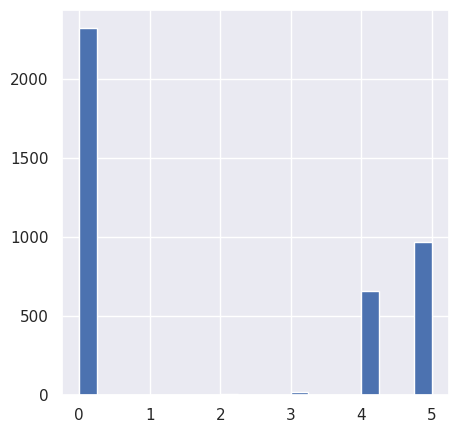

In [36]:
plt.hist(train['tutor_rating'], bins=20)
plt.show()

Репетиторов с ненулевым рейтингом мало, поэтому заполняем пропуски нулями.

In [37]:
train['tutor_rating'] = train['tutor_rating'].fillna(0)

In [38]:
train.isna().sum()

,0
tutor_rating,0
tutor_reviews,0
experience,0
mean_price,0
Взрослые кроме абитуриентов и студентов,0
Взрослые кроме абитуриентов и студентов в паре,0
Взрослые кроме абитуриентов и студентов группа,0
Дошкольники,0
Дошкольники в паре,0
Дошкольники группа,0


Проверим признаки на корреляцию.

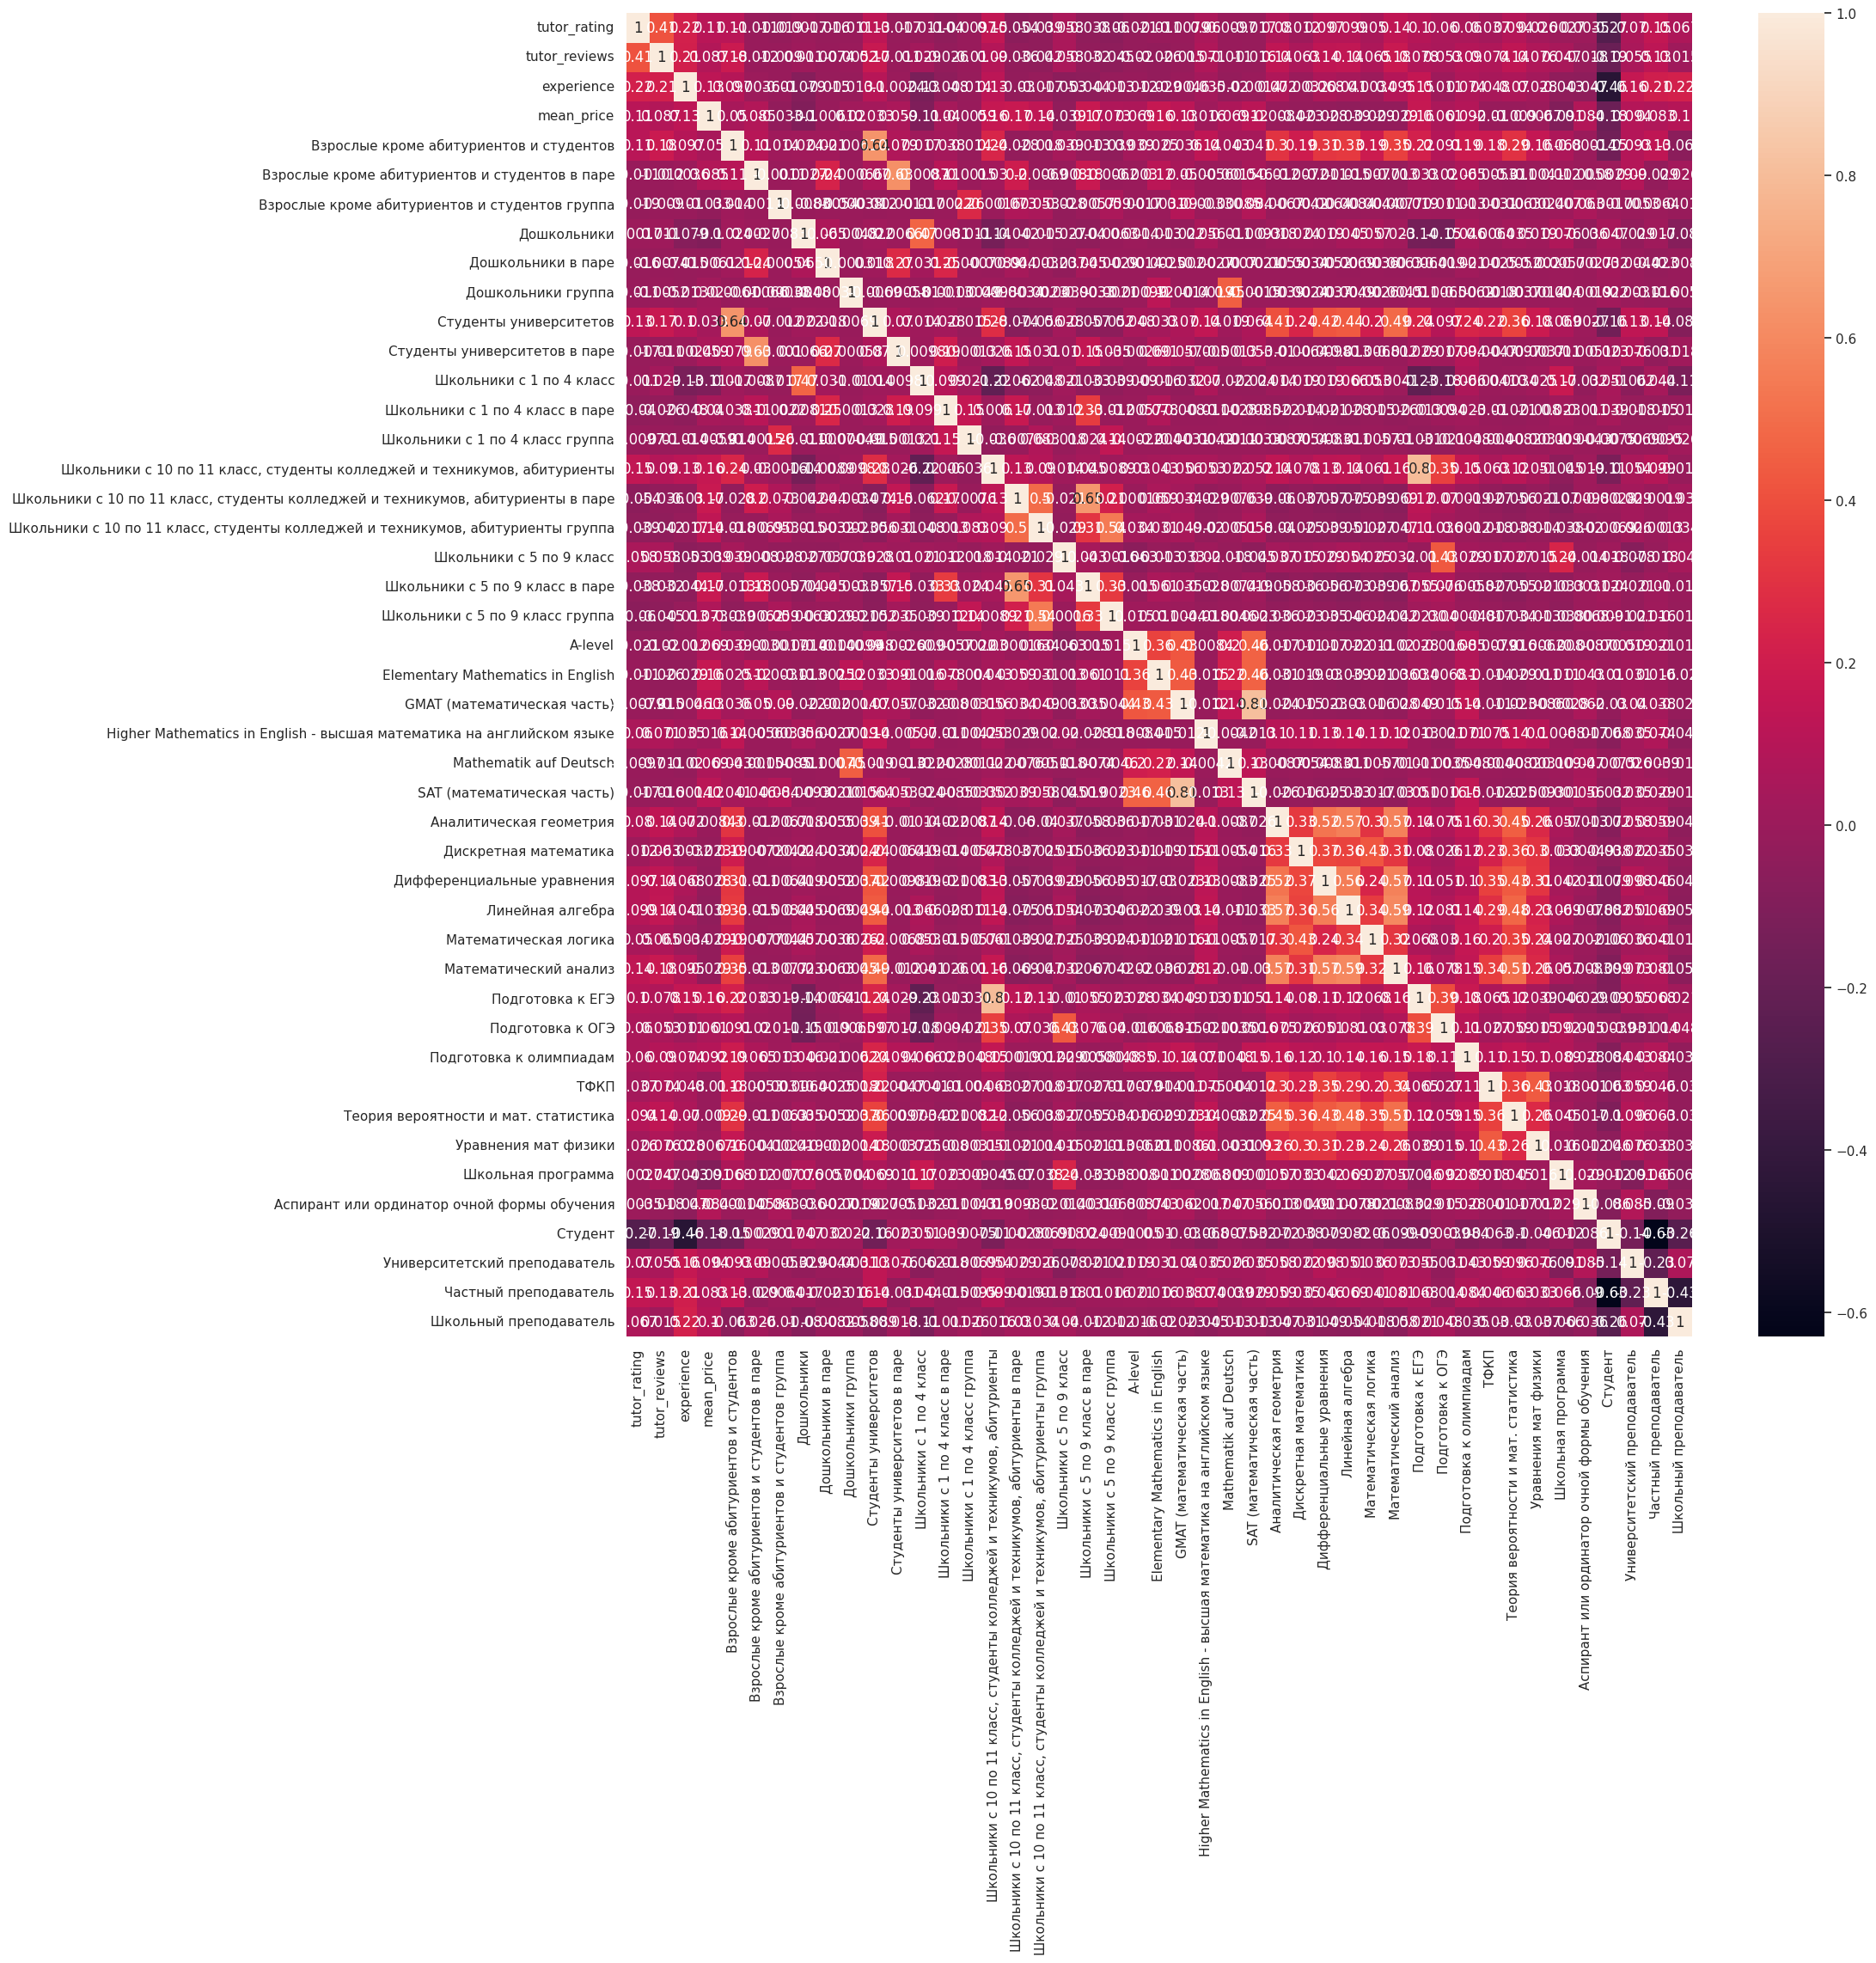

In [39]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(train.corr(), annot=True)
plt.show()

Имеется две пары признаков с высокой корреляцией.

#Моделирование

Зафиксируем случайность.

In [77]:
np.random.seed(42)

Разделим данные на `train` и `valid`.

In [78]:
X = train.drop(columns=['mean_price'])
Y = train['mean_price']

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(f'Train size: {X_train.shape}, {y_train.shape}')
print(f'Test size: {X_test.shape}, {y_test.shape}')

Train size: (3638, 44), (3638,)
Test size: (910, 44), (910,)


In [80]:
!pip install -q catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


Для предсказания целевой переменной используем регрессор из библиотеки CatBoost. Он основан на методе градиентного бустинга над деревьями решений и хорошо подходит для работы с категориальными признаками.

In [81]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


model = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=6, eval_metric='RMSE', random_seed=42, verbose=500)
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

y_pred = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

0:	learn: 10.3352071	test: 10.8197148	best: 10.8197148 (0)	total: 53.7ms	remaining: 1m 47s
500:	learn: 8.1785645	test: 10.0199435	best: 9.9732607 (173)	total: 3.77s	remaining: 11.3s
1000:	learn: 7.5155674	test: 10.1418798	best: 9.9732607 (173)	total: 8.24s	remaining: 8.22s
1500:	learn: 7.1523457	test: 10.2283064	best: 9.9732607 (173)	total: 12.5s	remaining: 4.15s
1999:	learn: 6.8828451	test: 10.2943207	best: 9.9732607 (173)	total: 15.5s	remaining: 0us

bestTest = 9.973260671
bestIteration = 173

Shrink model to first 174 iterations.
Mean Absolute Error: 6.768916439542267
Mean Squared Error: 99.46592887826817
R2 score: 0.15696626598406138


Протестируем с кроссвалидацией.

In [83]:
from sklearn.model_selection import cross_val_score

model = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=6, eval_metric='RMSE', random_seed=42, verbose=500)
scores = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')

0:	learn: 10.5329156	total: 2.9ms	remaining: 5.81s
500:	learn: 8.2077943	total: 1.15s	remaining: 3.44s
1000:	learn: 7.6009604	total: 3.59s	remaining: 3.59s
1500:	learn: 7.2443333	total: 6.52s	remaining: 2.17s
1999:	learn: 6.9642026	total: 8.39s	remaining: 0us
0:	learn: 10.4174696	total: 1.94ms	remaining: 3.88s
500:	learn: 8.2071897	total: 977ms	remaining: 2.92s
1000:	learn: 7.5366612	total: 1.93s	remaining: 1.92s
1500:	learn: 7.1670921	total: 2.88s	remaining: 958ms
1999:	learn: 6.8823342	total: 3.84s	remaining: 0us
0:	learn: 10.2377857	total: 2ms	remaining: 3.99s
500:	learn: 7.9146280	total: 945ms	remaining: 2.83s
1000:	learn: 7.3013571	total: 1.88s	remaining: 1.88s
1500:	learn: 6.9363451	total: 2.83s	remaining: 943ms
1999:	learn: 6.6828227	total: 5.1s	remaining: 0us
0:	learn: 10.5042712	total: 2.11ms	remaining: 4.21s
500:	learn: 8.0489942	total: 958ms	remaining: 2.87s
1000:	learn: 7.4166591	total: 1.92s	remaining: 1.91s
1500:	learn: 7.0576841	total: 2.86s	remaining: 952ms
1999:	learn:

Модель показывает стабильный результат, для разных частей датасета он слабо отклоняется от среднего значения.

Обучим модель на всех доступных данных.

In [84]:
model_full = CatBoostRegressor(iterations=2000, learning_rate=0.05, depth=6, eval_metric='RMSE', random_seed=42, verbose=500)
model_full.fit(X, Y)

0:	learn: 10.4281750	total: 3.35ms	remaining: 6.69s
500:	learn: 8.2467097	total: 1.03s	remaining: 3.08s
1000:	learn: 7.6659249	total: 2.06s	remaining: 2.05s
1500:	learn: 7.3291644	total: 3.09s	remaining: 1.03s
1999:	learn: 7.1038684	total: 4.14s	remaining: 0us


#Тестирование

Обработаем тестовые данные аналогично `train`.

In [85]:
test_proc = test.copy()
test_proc = pd.get_dummies(test_proc, columns=['предмет'])

test_proc['categories'] = test_proc['categories'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
cats_df = pd.DataFrame(cat_binarizer.transform(test_proc['categories']), columns=cat_binarizer.classes_)
test_proc = pd.concat([test_proc, cats_df], axis=1)

test_proc['tutor_head_tags'] = test_proc['tutor_head_tags'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)
tags_df = pd.DataFrame(tags_binarizer.transform(test_proc['tutor_head_tags']), columns=tags_binarizer.classes_)
test_proc = pd.concat([test_proc, tags_df], axis=1)

test_proc['status'] = test_proc['status'].fillna(status_mode)
test_proc['status'] = test_proc['status'].apply(
    lambda x: x.split(',') if isinstance(x, str) else x
)

stat_df = pd.DataFrame(stat_binarizer.transform(test_proc['status']), columns=stat_binarizer.classes_)
test_proc = pd.concat([test_proc, stat_df], axis=1)

test_proc['experience'] = test_proc['experience'].apply(
    lambda x: float(x.split()[0]) if isinstance(x, str) else np.nan
)
test_proc['experience'] = test_proc['experience'].astype('float32')
test_proc['experience'] = test_proc['experience'].fillna(exp_mean)

test_proc['tutor_rating'] = test_proc['tutor_rating'].fillna(0)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['Студенты университетов группа'] will be ignored
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ["[' Частный преподаватель']"] will be ignored
  warnings.warn(


Делаем предсказание для `test`.

In [87]:
test_proc = test_proc.reindex(columns=X.columns, fill_value=0)
test_proc = test_proc.astype(float)

y_test_pred = model_full.predict(test_proc)

submission = pd.DataFrame({'mean_price': y_test_pred})
submission = submission.reset_index()
submission.to_csv('submission.csv', index=False)
submission.head(10)

,index,mean_price
0,0,20.112606
1,1,7.677907
2,2,19.233204
3,3,17.330121
4,4,10.485607
5,5,14.926637
6,6,16.011681
7,7,14.925928
8,8,16.503390
9,9,22.254926


In [88]:
sample_submit.head(10)

,index,mean_price
0,0,19.878115
1,1,0.903784
2,2,19.925667
3,3,22.705076
4,4,33.187842
5,5,15.555301
6,6,6.769804
7,7,25.536983
8,8,10.145167
9,9,4.386522


In [89]:
!kaggle competitions submit tutors-lessons-prices-prediction -f submission.csv -m "My submission"

100% 33.9k/33.9k [00:01<00:00, 20.7kB/s]
Successfully submitted to Tutors lessons prices prediction